In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

In [7]:
movies= pd.read_csv("C:\\Users\\MAHFOOZ ALAM\\Desktop\\DATASET FOR USAGE\\Movies India.csv", encoding='latin-1')
movies.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [9]:
movies.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [10]:
df=movies.copy()

df.duplicated(subset='Name').value_counts()

False    13838
True      1671
dtype: int64

In [11]:
df.drop_duplicates(subset='Name',inplace=True)

df.duplicated().value_counts()

False    13838
dtype: int64

In [12]:
df.drop(df.index[0])

df.set_index(np.arange(len(df)),inplace=True)

In [13]:
movies.isnull().sum().sort_values(ascending=False)/len(df)

Duration    0.597557
Rating      0.548490
Votes       0.548417
Actor 3     0.227200
Actor 2     0.172279
Genre       0.135641
Actor 1     0.116852
Year        0.038156
Director    0.037939
Name        0.000000
dtype: float64

In [14]:
print('Null Values in Year Column',df['Year'].isnull().sum())
print('Null Values in Genre Column',df['Genre'].isnull().sum())

Null Values in Year Column 498
Null Values in Genre Column 1590


In [15]:
df.dropna(subset=['Year'],inplace=True)
df.dropna(subset=['Genre'],inplace=True)

print('Null Values in Year Column',df['Year'].isnull().sum())
print('Null Values in Genre Column',df['Genre'].isnull().sum())

Null Values in Year Column 0
Null Values in Genre Column 0


In [16]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [17]:
df['Duration']= df['Duration'].str.replace('min','').apply(pd.to_numeric)

df["Votes"]=df["Votes"].replace("$5.16M", 516)
df["Votes"] = pd.to_numeric(df['Votes'].str.replace(',',''))

In [18]:
df['Year'] = df['Year'].str.replace('(','').str.replace(')','')

C:\Users\MAHFOOZ ALAM\AppData\Local\Temp\ipykernel_16704\2152401264.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Year'] = df['Year'].str.replace('(','').str.replace(')','')


In [19]:
df.isnull().sum()

Name           0
Year           0
Duration    5455
Genre          0
Rating      4716
Votes       4716
Director     426
Actor 1     1001
Actor 2     1397
Actor 3     1859
dtype: int64

In [20]:
df['Rating'].fillna(df['Rating'].mode().max(),inplace=True)

df['Duration'].fillna(df['Duration'].mean(),inplace=True)

df['Votes'].fillna(df['Votes'].mean(),inplace=True)

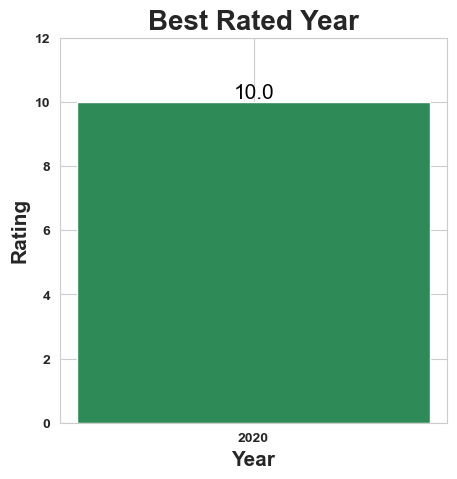

In [21]:
best_rating=df[['Year','Rating']].sort_values(by='Rating',ascending=False).head(1)

fig=plt.figure(figsize=(5,5))
bars=plt.bar(x='Year',height='Rating',data=best_rating,color='seagreen')

plt.xlabel("Year",fontsize=15,fontweight='bold')
plt.ylabel("Rating",fontsize=15,fontweight='bold')
plt.title("Best Rated Year",fontsize=20,fontweight='bold')

plt.xticks(fontweight='bold',rotation=0)
plt.yticks(np.arange(0,13,2),fontweight='bold')

for ele in bars:
    plt.text(ele.get_x()+(ele.get_width()/2),ele.get_y()+ele.get_height(),ele.get_height(),color='black',ha='center',
             va='bottom',fontsize=15)

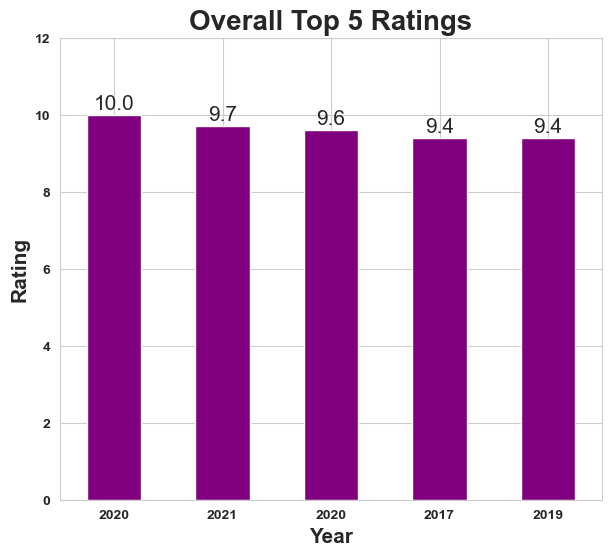

In [22]:
top5_rating=df[['Year','Rating']].sort_values(by='Rating',ascending=False).head()

bars=top5_rating.plot(kind='bar',x='Year',y='Rating',color='purple',legend=None,figsize=(7,6))

plt.xlabel("Year",fontsize=15,fontweight='bold')
plt.ylabel("Rating",fontsize=15,fontweight='bold')
plt.title("Overall Top 5 Ratings",fontsize=20,fontweight='bold')

plt.xticks(fontweight='bold',rotation=0)
plt.yticks(np.arange(0,13,2),fontweight='bold')


for bar in bars.patches:
    bars.annotate(format(bar.get_height(),'.1f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

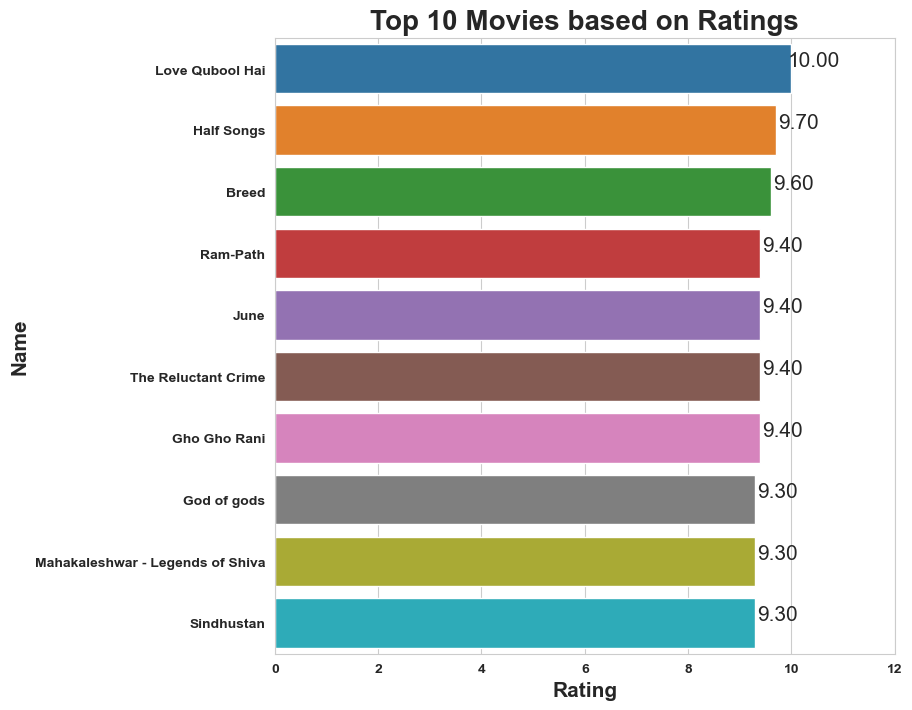

In [23]:
plt.figure(figsize=(8, 8))

dframe= df.set_index('Year')
dframe.drop(index='2022',inplace=True)

top_movies= dframe[['Name','Rating']].sort_values(by='Rating',ascending=False).head(10)

plots = sns.barplot(x="Rating", y="Name", data=top_movies)

for bar in plots.patches:
    
    plots.annotate(format(bar.get_width(),'.2f'), 
                   (bar.get_x() + bar.get_width()+0.3, 
                    bar.get_y()+0.5), ha='center', va='center',
                   size=15, xytext=(5,10),
                   textcoords='offset points')

    
plt.xlabel("Rating",fontsize=15,fontweight='bold')
plt.ylabel("Name",fontsize=15,fontweight='bold')
plt.title("Top 10 Movies based on Ratings",fontsize=20,fontweight='bold')

plt.xticks(np.arange(0,13,2),fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

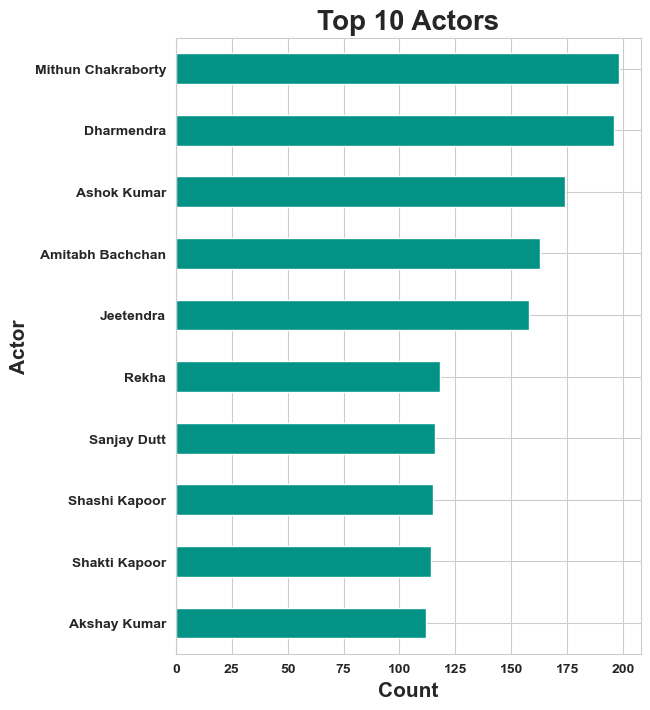

In [24]:
Actor1=df['Actor 1']
Actor2=df['Actor 2']
Actor3=df['Actor 3']

Actors = pd.concat([Actor1,Actor2,Actor3])

frequent_actor=Actors.value_counts().sort_values(ascending=False).head(10)

frequent_actor.sort_values().plot(kind='barh',color='#029386',figsize=(6,8))

plt.title('Top 10 Actors',fontweight='bold',fontsize=20)
plt.xlabel('Count',fontweight='bold',fontsize=15)
plt.ylabel('Actor',fontweight='bold',fontsize=15)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

In [25]:
from collections import Counter

Genre=dframe['Genre']

Genre_counter=Counter()

for response in Genre:
    Genre_counter.update(response.split(','))
    
print(Genre_counter.most_common(10))

Genres=[]
frequency=[]

for items in Genre_counter.most_common(10):
    Genres.append(items[0])
    frequency.append(items[1])

    
Genres.pop(2)
frequency.pop(2)

[('Drama', 3836), ('Action', 2979), (' Drama', 2426), (' Romance', 1483), ('Comedy', 1408), (' Thriller', 777), (' Crime', 765), ('Thriller', 698), (' Family', 658), ('Romance', 653)]


2426

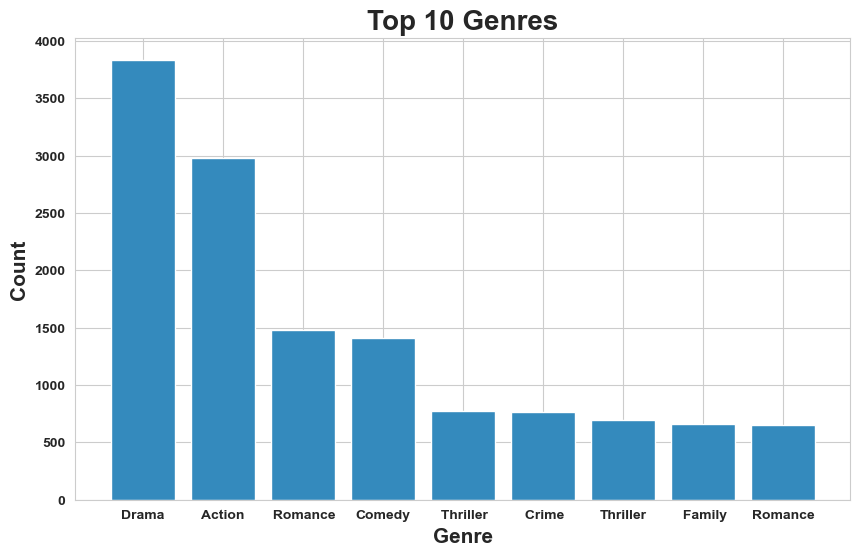

In [26]:
fig= plt.figure(figsize=(10,6))
plt.bar(Genres,frequency,color='#348ABD')
plt.title('Top 10 Genres',fontweight='bold',fontsize=20)
plt.xlabel('Genre',fontweight='bold',fontsize=15)
plt.ylabel('Count',fontweight='bold',fontsize=15)
plt.xticks(fontweight='bold',rotation=0)
plt.yticks(fontweight='bold')
plt.show()

In [27]:
def top10(column):
    global dframe
    dframe[column].value_counts().sort_values(ascending=False).head(10).plot(kind='bar',
                                                                            figsize=(15,6),color='#988ED5')
    
    plt.xlabel(column,fontsize=15,fontweight='bold')
    plt.ylabel('Count',fontweight='bold',fontsize=15)
    plt.title("Top 10 {}".format(column),fontsize=25,fontweight='bold')
    plt.xticks(rotation=0,fontsize=9,fontweight='bold')
    plt.yticks(fontsize=10,fontweight='bold')
    plt.show()

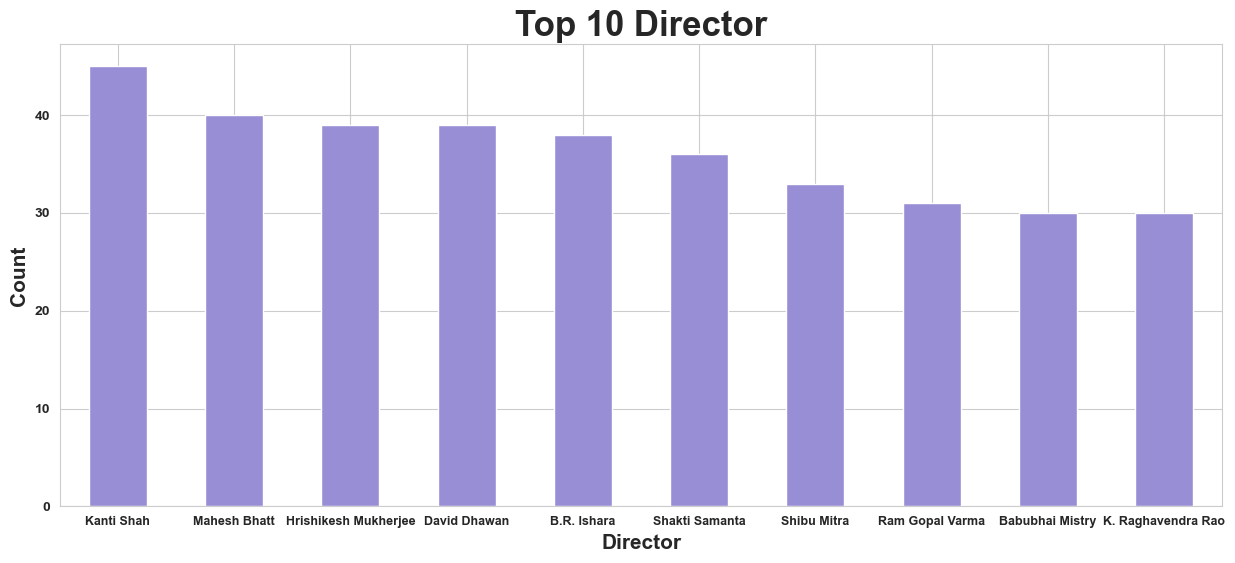

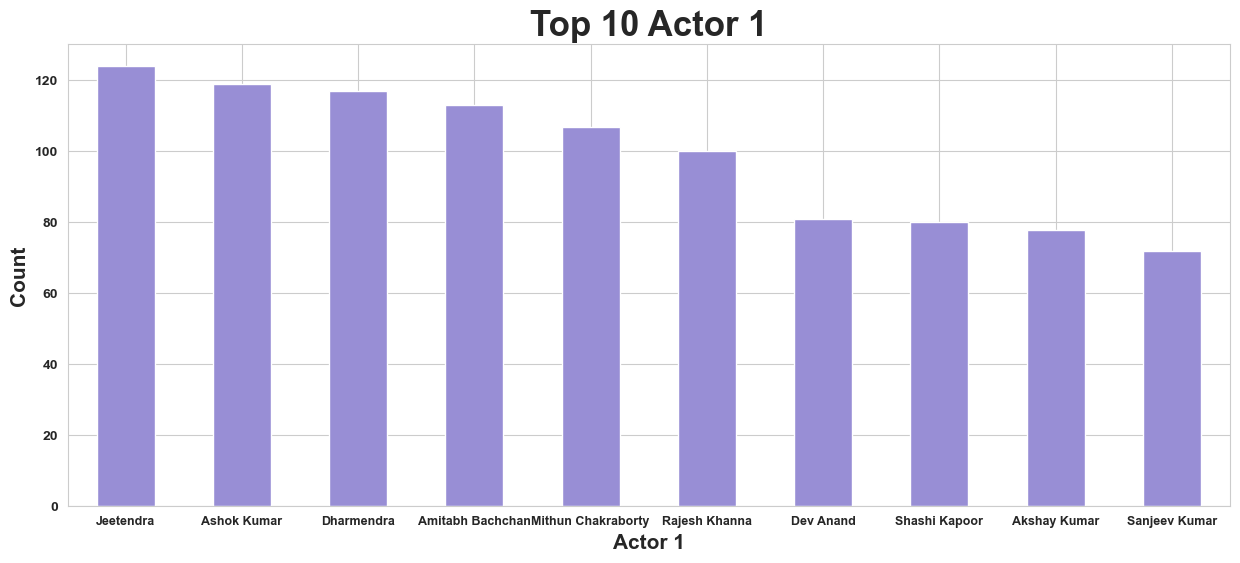

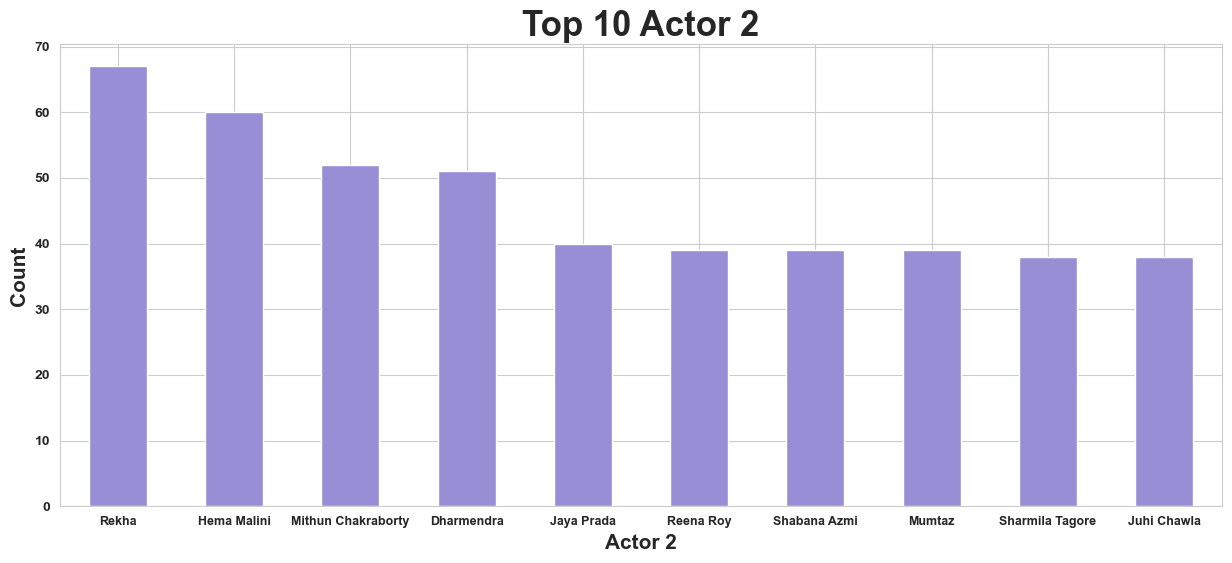

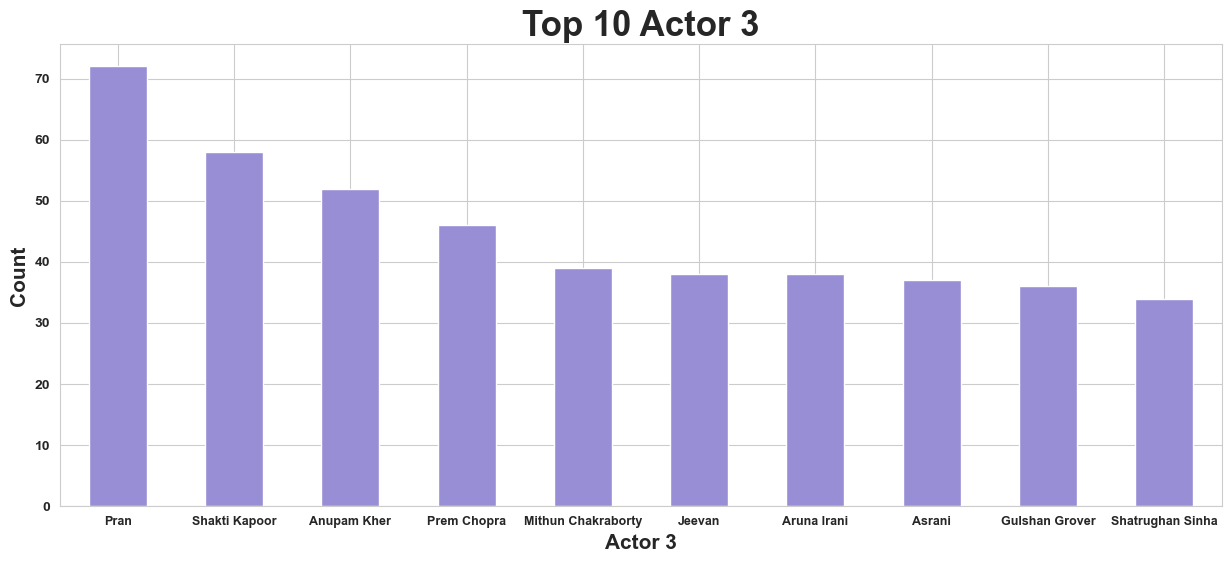

In [28]:
cols=['Director','Actor 1','Actor 2','Actor 3']
for items in cols:
    top10(items)

In [29]:
def distribution(column):
    global dframe
    fig=plt.figure(figsize=(8,6))
    sns.displot(x=column,data=dframe,palette='gist_earth_r',bins=25)
    plt.xlabel(column,fontweight='bold',fontsize=15)
    plt.ylabel('Density',fontweight='bold',fontsize=15)
    plt.title('Distribution of {}'.format(column),fontweight='bold',fontsize=20)
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.show()
    
dframe['Released_Year']= dframe.index.astype('int64')

C:\Users\MAHFOOZ ALAM\AppData\Local\Temp\ipykernel_16704\2637465140.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x=column,data=dframe,palette='gist_earth_r',bins=25)


<Figure size 800x600 with 0 Axes>

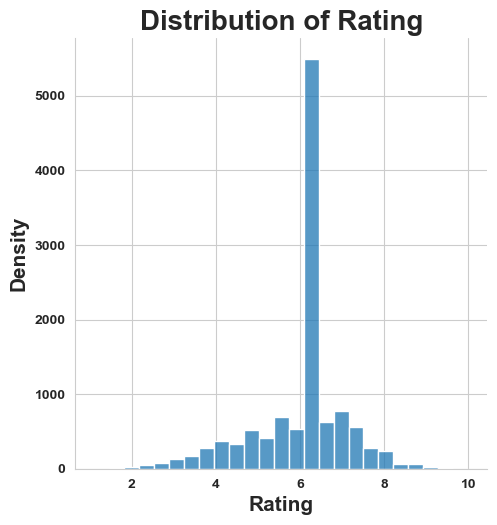

C:\Users\MAHFOOZ ALAM\AppData\Local\Temp\ipykernel_16704\2637465140.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x=column,data=dframe,palette='gist_earth_r',bins=25)


<Figure size 800x600 with 0 Axes>

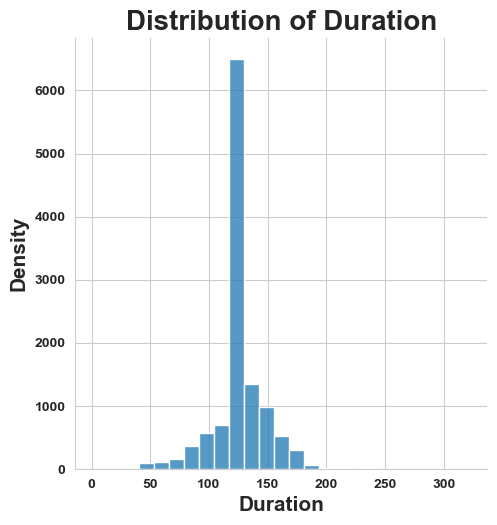

C:\Users\MAHFOOZ ALAM\AppData\Local\Temp\ipykernel_16704\2637465140.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x=column,data=dframe,palette='gist_earth_r',bins=25)


<Figure size 800x600 with 0 Axes>

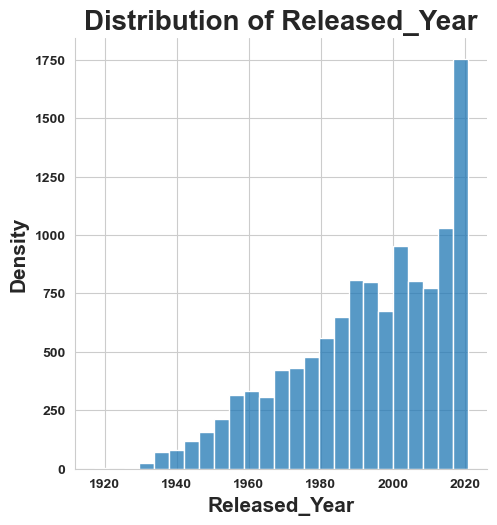

C:\Users\MAHFOOZ ALAM\AppData\Local\Temp\ipykernel_16704\2637465140.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x=column,data=dframe,palette='gist_earth_r',bins=25)


<Figure size 800x600 with 0 Axes>

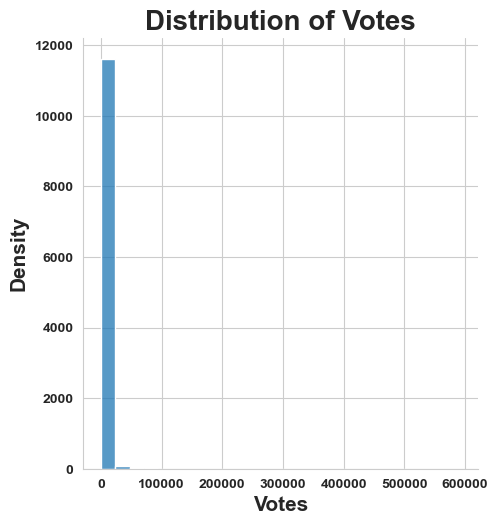

In [30]:
lis=['Rating','Duration','Released_Year','Votes']
i=0
while i< len(lis):
    distribution(lis[i])
    i+=1

C:\Users\MAHFOOZ ALAM\AppData\Local\Temp\ipykernel_16704\4021429808.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dframe.corr(), cmap="YlGnBu", annot=True)


<Axes: >

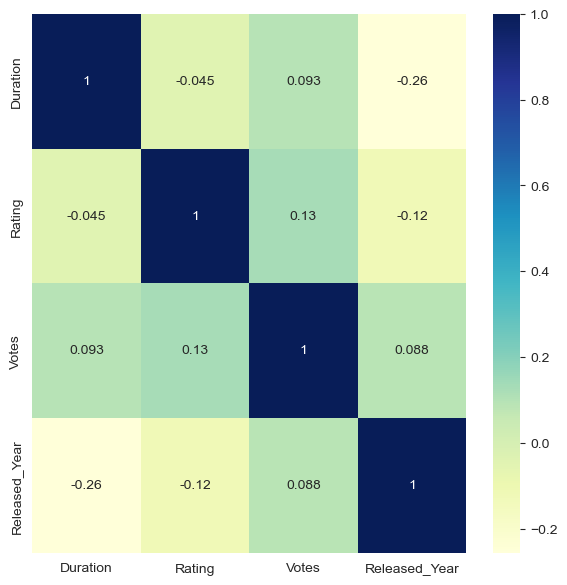

In [31]:
fig= plt.figure(figsize=(7,7))
sns.heatmap(dframe.corr(), cmap="YlGnBu", annot=True)